In [1]:
suppressPackageStartupMessages(suppressWarnings({
  library(arrow)
  library(dplyr)
  library(tidyr)
  library(ggplot2)
}))

In [2]:
map_results_file_path <- file.path(
    "../data/0.ground_truth/map.parquet"
)

map_df <- arrow::read_parquet(map_results_file_path)
head(map_df)

Metadata_dose,Metadata_reference_index,mean_average_precision,indices,p_value,corrected_p_value,below_p,below_corrected_p
<dbl>,<int>,<dbl>,<list<integer>>,<dbl>,<dbl>,<lgl>,<lgl>
0.61,-1,0.6892923,"20, 21, 22, 23, 44, 45, 46, 47",0.10981989,0.19767580,FALSE,FALSE
1.22,-1,0.5825824,"0, 1, 2, 3, 32, 33, 34, 35",0.30429870,0.34233603,FALSE,FALSE
2.44,-1,0.5067212,"24, 25, 26, 27, 52, 53, 54, 55",0.51519448,0.51519448,FALSE,FALSE
4.88,-1,0.6364224,"12, 13, 14, 15, 40, 41, 42, 43",0.18954881,0.24370561,FALSE,FALSE
9.77,-1,0.7920609,"16, 17, 18, 19, 48, 49, 50, 51",0.02682697,0.06036069,TRUE,FALSE
19.53,-1,0.6613249,"8, 9, 10, 11, 64, 65, 66, 67",0.14836685,0.22255028,FALSE,FALSE


In [3]:
map_df$Metadata_dose <- factor(
    map_df$Metadata_dose,
    levels = c(
        "0.61",
        "1.22",
        "2.44",
        "4.88",
        "9.77",
        "19.53",
        "39.06",
        "78.13",
        "156.25"
))


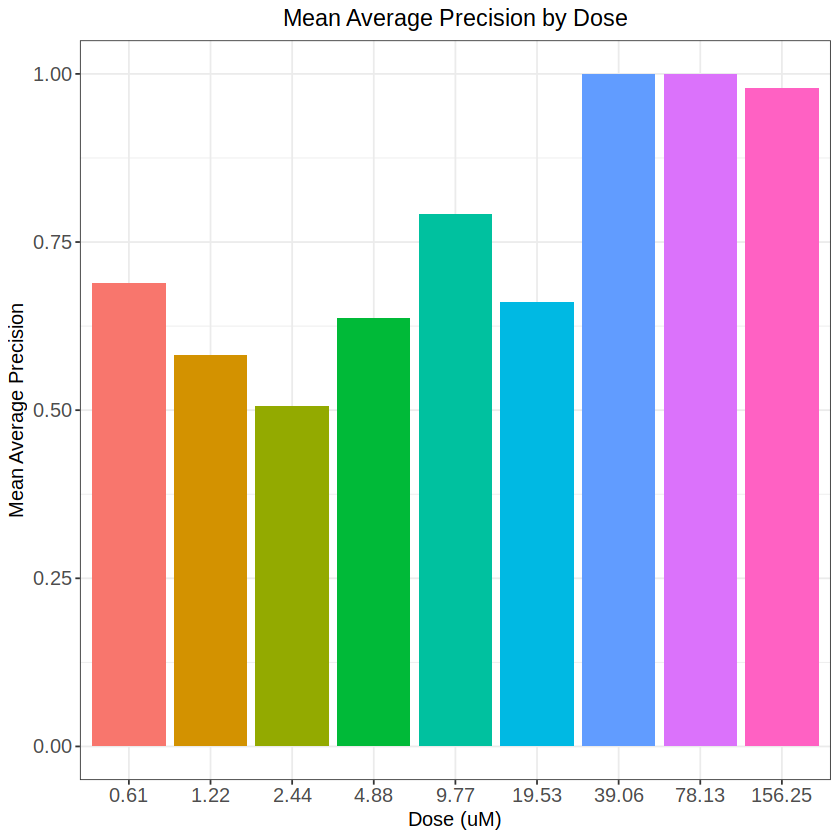

In [4]:
map_plot <- (
    ggplot(map_df, aes(x=Metadata_dose, y=mean_average_precision, fill=Metadata_dose))
    + geom_bar(stat="identity")
    + ylim(0,1)
    + theme_bw()
    + labs(
        title="Mean Average Precision by Dose",
        x="Dose (uM)",
        y="Mean Average Precision"
    )
    + theme(
        axis.text.x = element_text(size = 12),
        axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        plot.title = element_text(size = 14, hjust = 0.5),
        legend.position = "none"
    )
)
ggsave("../figures/mean_average_precision_by_dose.png", plot=map_plot, width=6, height=4)
map_plot

In [5]:
# write the ground truth map_df to a csv file
ground_truth_df <- data.frame(
    Metadata_dose = map_df$Metadata_dose,
    mean_average_precision = map_df$mean_average_precision
)
ground_truth_df$apoptosis <- "control"
# change to control negative or positive
ground_truth_df <- ground_truth_df %>% mutate(
    apoptosis = ifelse(mean_average_precision > 0.8, "positive", "negative")
) 
# drop the mean_average_precision column
ground_truth_df <- ground_truth_df %>% select(-mean_average_precision)
# sort by Metadata_dose
# add the 0 dose row
ground_truth_df <- ground_truth_df %>% add_row(
    Metadata_dose = "0",
    apoptosis = "control"
)
ground_truth_df$Metadata_dose <- factor(
    ground_truth_df$Metadata_dose,
    levels = c(
        "0",
        "0.61",
        "1.22",
        "2.44",
        "4.88",
        "9.77",
        "19.53",
        "39.06",
        "78.13",
        "156.25"
    )
)

ground_truth_df
write.csv(
    ground_truth_df,
    file = "../data/0.ground_truth/ground_truth.csv",
    row.names = FALSE
)

Metadata_dose,apoptosis
<fct>,<chr>
0.61,negative
1.22,negative
2.44,negative
4.88,negative
9.77,negative
19.53,negative
39.06,positive
78.13,positive
156.25,positive
